#  Envirnoment Setup

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost


In [2]:
pip install tensorflow keras


# 2. Data Loading and Preprocessing

a) Loading the Data

In [3]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Display the first few rows of the training data
train_df.head()


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


b) Handling Missing Values

In [4]:
# Check for missing values
print(train_df.isnull().sum())

# If there are missing values, use forward fill or backward fill directly
train_df.ffill(inplace=True)
test_df.ffill(inplace=True)


date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64


c) Scaling/Normalization

Since the dataset involves different load values, it’s good to scale them to ensure uniformity.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the relevant columns
features_to_scale = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])


# 3. Feature Engineering

a) Creating Time-based Features

We'll extract information like hour, day of the week, and month from the date field.

In [6]:
# Convert the date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Create new time-based features
train_df['hour'] = train_df['date'].dt.hour
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['month'] = train_df['date'].dt.month

test_df['hour'] = test_df['date'].dt.hour
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['month'] = test_df['date'].dt.month


b) Creating Lag Features

Lag features help the model understand temporal dependencies.

In [7]:
# Creating lag features for OT
train_df['OT_lag1'] = train_df['OT'].shift(1)
train_df['OT_lag2'] = train_df['OT'].shift(2)

# Fill NaN values created by the shift with 0
train_df.fillna(0, inplace=True)


# 4. Data Exploration and Insights

a) Visualizing the Data

Plotting the OT values and some load features.

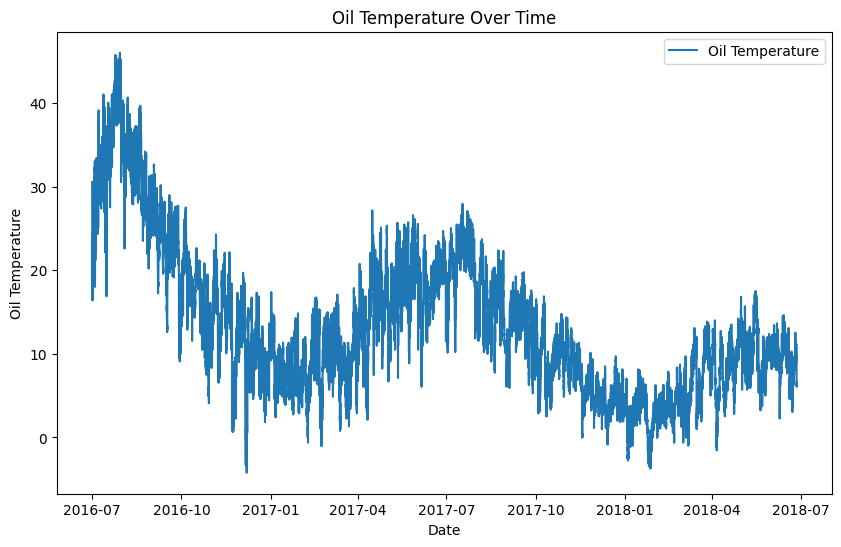

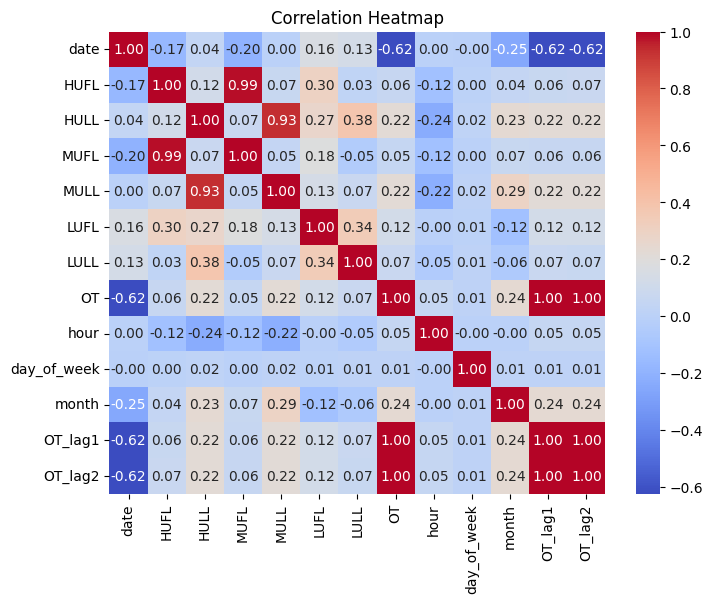

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot OT over time
plt.figure(figsize=(10, 6))
plt.plot(train_df['date'], train_df['OT'], label='Oil Temperature')
plt.title('Oil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1. Summary Statistics:

Provides an overview of the central tendencies, dispersions, and potential outliers in your dataset.

In [9]:
# Summary statistics
summary_stats = train_df.describe()
print(summary_stats)


                      date          HUFL          HULL          MUFL  \
count                69696  69696.000000  69696.000000  69696.000000   
mean   2017-06-28 23:52:30      0.646443      0.496886      0.690359   
min    2016-07-01 00:00:00      0.000000      0.000000      0.000000   
25%    2016-12-29 11:56:15      0.612986      0.405860      0.667476   
50%    2017-06-28 23:52:30      0.675836      0.493691      0.728213   
75%    2017-12-27 11:48:45      0.738687      0.585770      0.787376   
max    2018-06-26 23:45:00      1.000000      1.000000      1.000000   
std                    NaN      0.149344      0.127509      0.153607   

               MULL          LUFL          LULL            OT          hour  \
count  69696.000000  69696.000000  69696.000000  69696.000000  69696.000000   
mean       0.499303      0.440900      0.504610     13.319066     11.500000   
min        0.000000      0.000000      0.000000     -4.221000      0.000000   
25%        0.414352      0.361656  

2. Correlation Heatmap:

Helps to understand the relationships between different features in the dataset.

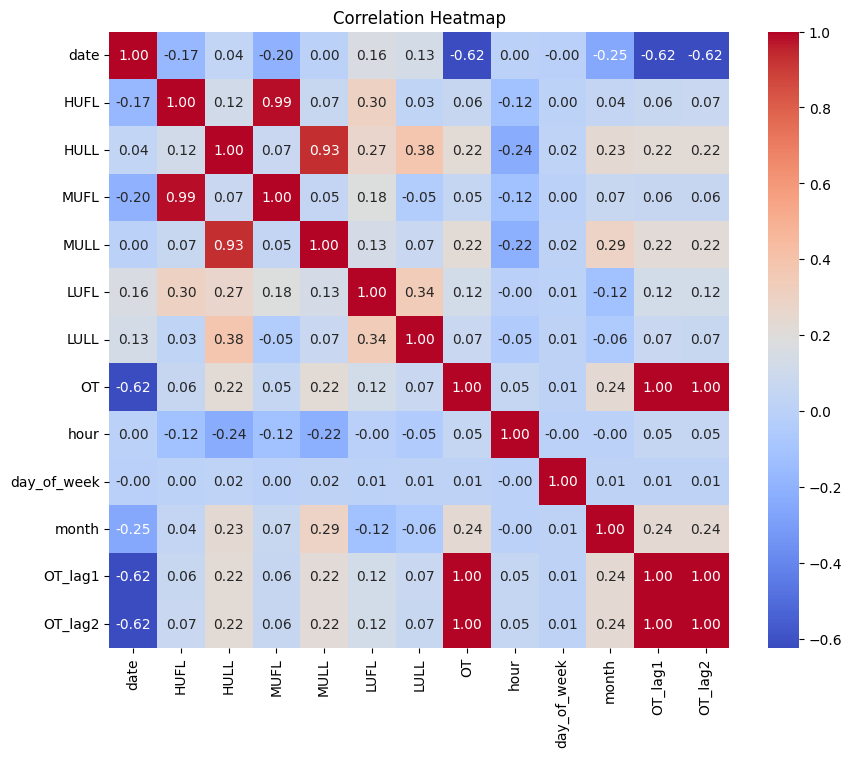

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


3. Time Series Plot:

Visualize how oil temperature changes over time to identify trends, seasonality, and outliers.

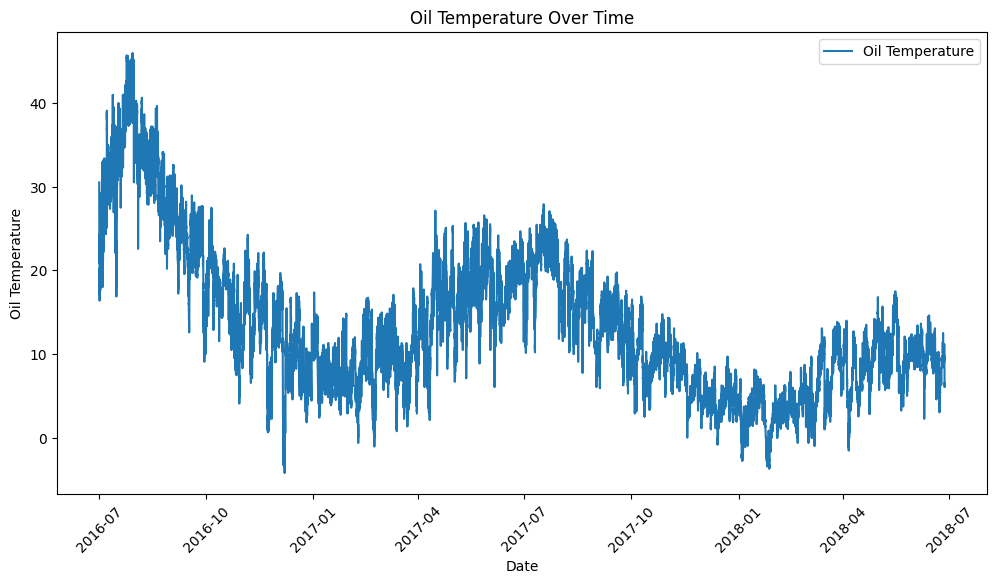

In [11]:
# Plot OT over time
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['OT'], label='Oil Temperature')
plt.title('Oil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.show()


4. Distribution of Oil Temperature:

Analyze the distribution of the target variable to detect skewness, outliers, and general patterns.

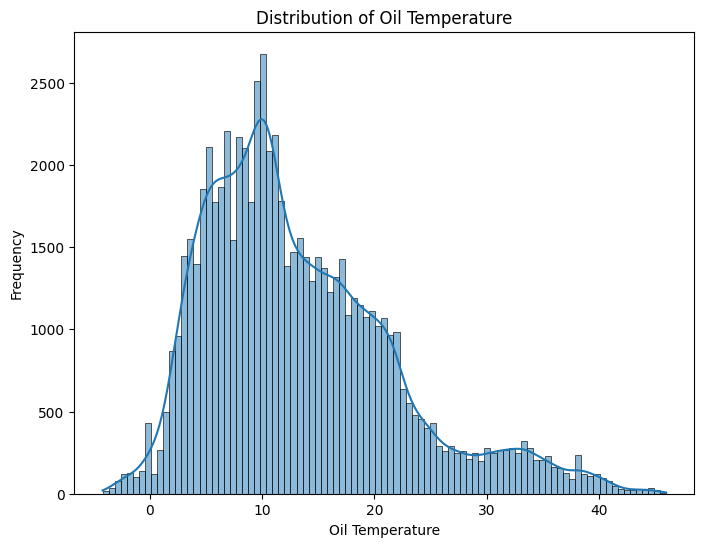

In [12]:
# Distribution plot of Oil Temperature
plt.figure(figsize=(8, 6))
sns.histplot(train_df['OT'], kde=True)
plt.title('Distribution of Oil Temperature')
plt.xlabel('Oil Temperature')
plt.ylabel('Frequency')
plt.show()


5. Pairplot of Load Features and Oil Temperature:

This visualization helps to examine the relationships between the different load features and oil temperature.

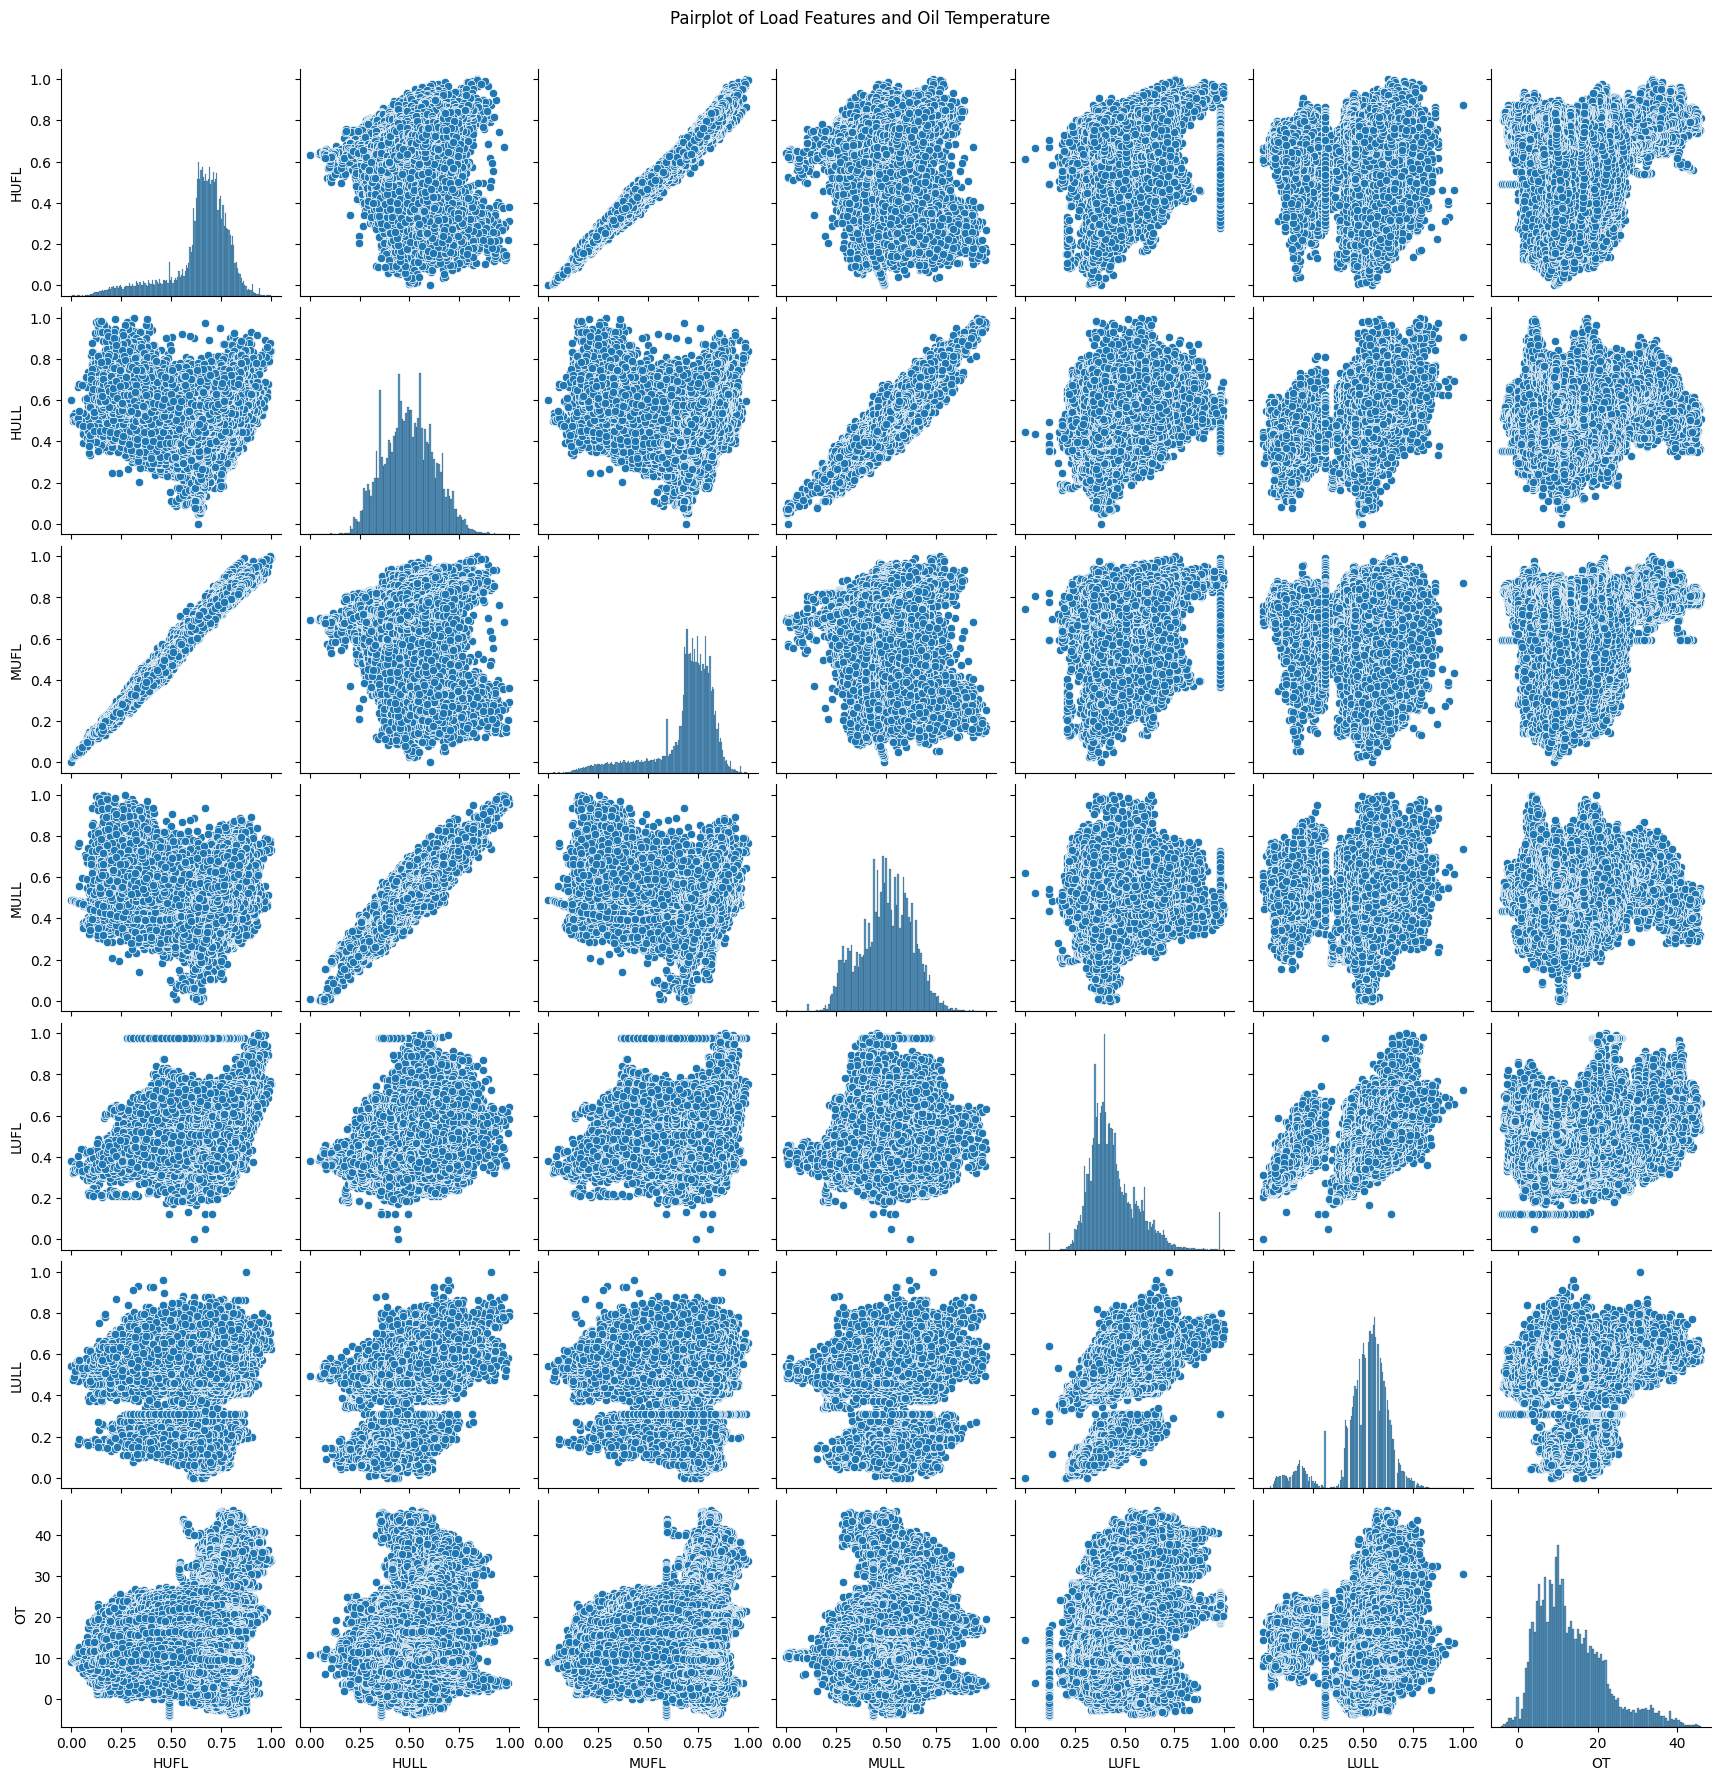

In [13]:
# Pairplot for load features and OT
sns.pairplot(train_df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']])
plt.suptitle('Pairplot of Load Features and Oil Temperature', y=1.02)
plt.show()


# 5. Model Building

a) Model Selection and Training

Using a XGboost model:

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Split the data
X = train_df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'hour', 'day_of_week', 'month', 'OT_lag1', 'OT_lag2']]
y = train_df['OT']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# 3. Predict on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# 4. Evaluate the model
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Calculate MAPE
epsilon = 1e-10  # Small value to avoid division by zero
non_zero_indices = np.abs(y_val) > epsilon
filtered_y_val = y_val[non_zero_indices]
filtered_y_pred_xgb = y_pred_xgb[non_zero_indices]
mape_xgb = np.mean(np.abs((filtered_y_val - filtered_y_pred_xgb) / filtered_y_val)) * 100

# 5. Print the model evaluation metrics
print(f'XGBoost Model Evaluation Metrics:')
print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')
print(f'R-squared (R²): {r2_xgb}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_xgb}%')


XGBoost Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.2966724824758031
Root Mean Squared Error (RMSE): 0.4545638535566636
R-squared (R²): 0.9971383397145058
Mean Absolute Percentage Error (MAPE): 3.5934542138403374%


b) Forecasting for the Next 24 Hours

In [15]:
# Assuming the XGBoost model (xgb_model) and train_df are already defined and trained as per the previous steps.

# Function to create lag features
def create_lag_features(df, lags, target_col):
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    df.fillna(0, inplace=True)
    return df

# Preparing the test data
test_df = create_lag_features(test_df, lags=[1, 2], target_col='OT')  # Using lag features from OT

# Select the features used for prediction
X_test = test_df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'hour', 'day_of_week', 'month', 'OT_lag1', 'OT_lag2']]

# Perform the prediction using the trained XGBoost model
test_predictions = xgb_model.predict(X_test)

# Adding predictions to the test dataframe
test_df['Predicted_OT'] = test_predictions

# Displaying the predictions for the next 24 hours
print(test_df[['date', 'Predicted_OT']].head(24))


                  date  Predicted_OT
0  2018-06-27 00:00:00      1.665359
1  2018-06-27 01:00:00     31.309767
2  2018-06-27 02:00:00     31.218454
3  2018-06-27 03:00:00     31.206345
4  2018-06-27 04:00:00     31.224863
5  2018-06-27 05:00:00     31.801563
6  2018-06-27 06:00:00     31.988026
7  2018-06-27 07:00:00     32.483894
8  2018-06-27 08:00:00     32.686352
9  2018-06-27 09:00:00     32.920555
10 2018-06-27 10:00:00     33.956394
11 2018-06-27 11:00:00     34.603485
12 2018-06-27 12:00:00     34.575314
13 2018-06-27 13:00:00     35.926064
14 2018-06-27 14:00:00     36.497650
15 2018-06-27 15:00:00     36.763771
16 2018-06-27 16:00:00     37.770870
17 2018-06-27 17:00:00     37.505344
18 2018-06-27 18:00:00     36.388878
19 2018-06-27 19:00:00     36.388737
20 2018-06-27 20:00:00     36.883865
21 2018-06-27 21:00:00     35.860291
22 2018-06-27 22:00:00     34.721752
23 2018-06-27 23:00:00     34.278767


Analyze the Forecast:

1) Review the first 24 hours of predictions to understand the model's performance.

2) You might want to plot the predicted values against the actual values if available to visually assess the model's accuracy.

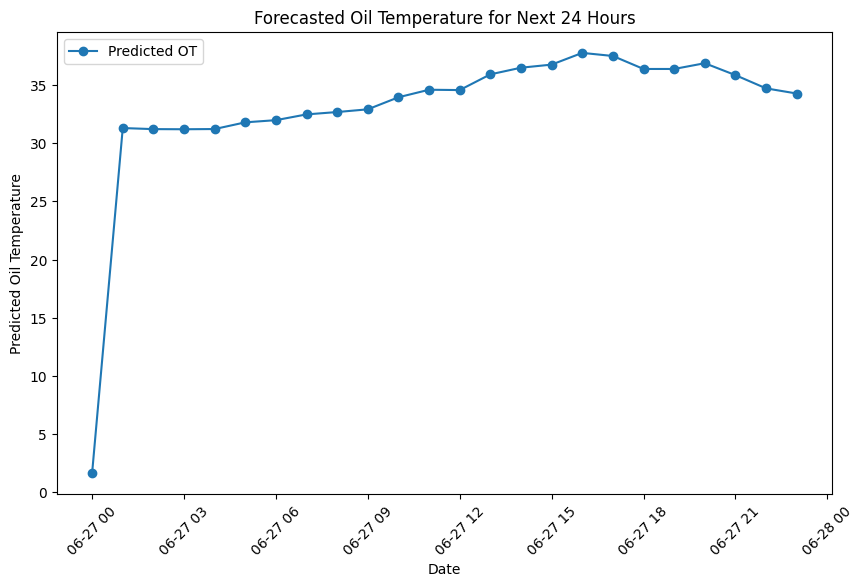

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_df['date'].head(24), test_df['Predicted_OT'].head(24), label='Predicted OT', marker='o')
plt.title('Forecasted Oil Temperature for Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('Predicted Oil Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 6. Model Evaluation Metrics

1. Model Evaluation Metrics

We'll use the following metrics for evaluating the model:

1) Mean Absolute Error (MAE): Measures the average magnitude of errors in the predictions, without considering their direction.

2) Root Mean Squared Error (RMSE): Provides a quadratic scoring rule that penalizes large errors more than MAE.

3) R-squared (R²): Represents the proportion of the variance for the target variable that's explained by the model.

4) Mean Absolute Percentage Error (MAPE): Measures the average percentage error between predicted and actual values. Lower MAPE values indicate higher accuracy in predictions relative to the actual values.

2. Evaluate on Validation Set

a) Calculate MAE, RMSE, R² and MAPE

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the validation set
y_pred = xgb_model.predict(X_val)

# Calculate MAE
mae = mean_absolute_error(y_val, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

# Calculate R-squared (R²)
r2 = r2_score(y_val, y_pred)

# Filter out near-zero values in y_val
non_zero_indices = y_val != 0
filtered_y_val = y_val[non_zero_indices]
filtered_y_pred = y_pred[non_zero_indices]

# Calculate MAPE only on non-zero actual values
if len(filtered_y_val) > 0:
    mape = np.mean(np.abs((filtered_y_val - filtered_y_pred) / filtered_y_val)) * 100
else:
    mape = np.inf  # Handle the case where all values are zero

# Print the model evaluation metrics including the adjusted MAPE
print(f'Model Evaluation Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.2966724824758031
Root Mean Squared Error (RMSE): 0.4545638535566636
R-squared (R²): 0.9971383397145058
Mean Absolute Percentage Error (MAPE): 3.5934542138403374%


3. Visualize the Predictions vs. Actual Values

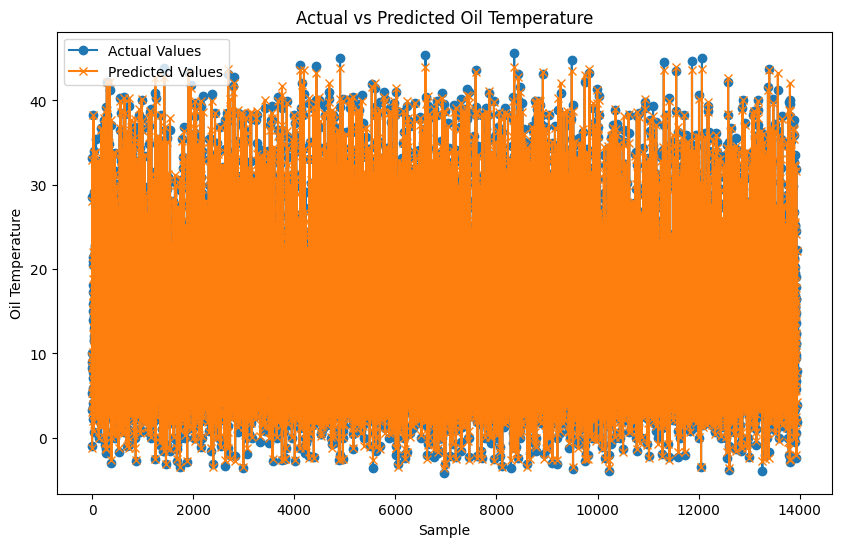

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Oil Temperature')
plt.xlabel('Sample')
plt.ylabel('Oil Temperature')
plt.legend()
plt.show()


# Complete Code with Docstrings

date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Model Evaluation Metrics:
MAE: 0.2962866367840033
RMSE: 0.4540814832311419
R²: 0.9971444099182077
MAPE: 3.602218845781708%


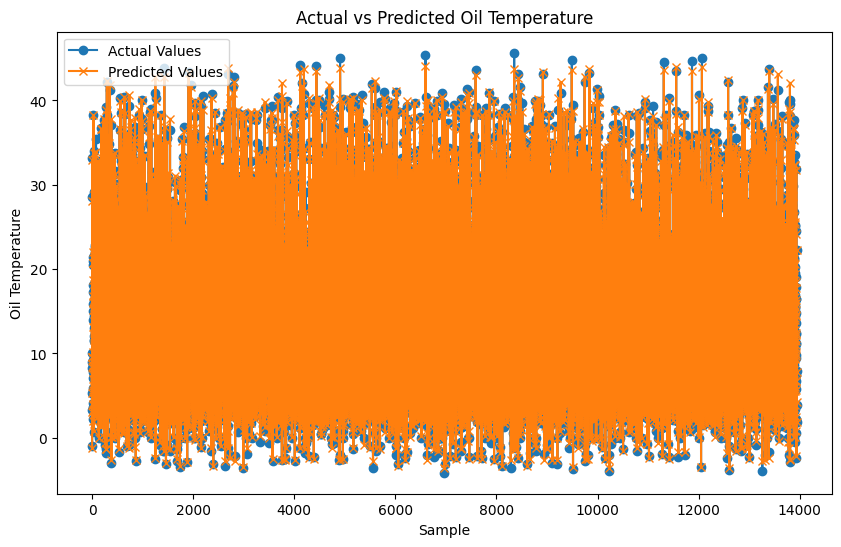

                  date  Predicted_OT
0  2018-06-27 00:00:00     29.038275
1  2018-06-27 01:00:00     31.361973
2  2018-06-27 02:00:00     31.214539
3  2018-06-27 03:00:00     31.161263
4  2018-06-27 04:00:00     31.161263
5  2018-06-27 05:00:00     31.736141
6  2018-06-27 06:00:00     31.845865
7  2018-06-27 07:00:00     32.291183
8  2018-06-27 08:00:00     32.597088
9  2018-06-27 09:00:00     32.955505
10 2018-06-27 10:00:00     33.993179
11 2018-06-27 11:00:00     34.519203
12 2018-06-27 12:00:00     34.540855
13 2018-06-27 13:00:00     35.883591
14 2018-06-27 14:00:00     36.482258
15 2018-06-27 15:00:00     36.755798
16 2018-06-27 16:00:00     37.813171
17 2018-06-27 17:00:00     37.673309
18 2018-06-27 18:00:00     36.455799
19 2018-06-27 19:00:00     36.455441
20 2018-06-27 20:00:00     36.964241
21 2018-06-27 21:00:00     35.836922
22 2018-06-27 22:00:00     34.851597
23 2018-06-27 23:00:00     34.539017


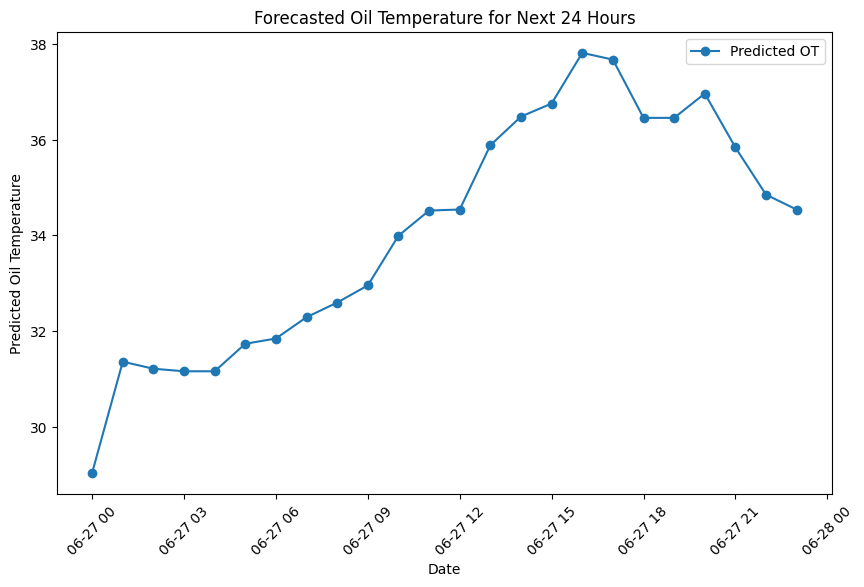

In [29]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def create_lag_features(df, lags, target_col):
    """
    Creates lag features for a given dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    lags (list): A list of integers representing the lag periods to create.
    target_col (str): The name of the target column for which to create lag features.

    Returns:
    pd.DataFrame: The dataframe with the new lag features added.
    """
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    df.ffill(inplace=True)
    return df

def evaluate_model(y_true, y_pred):
    """
    Evaluates the model's performance using various metrics.

    Parameters:
    y_true (np.ndarray or pd.Series): Actual values of the target variable.
    y_pred (np.ndarray or pd.Series): Predicted values from the model.

    Returns:
    dict: A dictionary containing MAE, RMSE, R², and MAPE.
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    # Filter out near-zero values in y_true for MAPE calculation
    epsilon = 1e-10
    non_zero_indices = np.abs(y_true) > epsilon
    filtered_y_true = y_true[non_zero_indices]
    filtered_y_pred = y_pred[non_zero_indices]

    if len(filtered_y_true) > 0:
        mape = np.mean(np.abs((filtered_y_true - filtered_y_pred) / filtered_y_true)) * 100
    else:
        mape = np.inf  # Handle the case where all values are zero

    return {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

def plot_predictions(y_true, y_pred):
    """
    Plots the actual vs predicted values.

    Parameters:
    y_true (np.ndarray or pd.Series): Actual values of the target variable.
    y_pred (np.ndarray or pd.Series): Predicted values from the model.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.values, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title('Actual vs Predicted Oil Temperature')
    plt.xlabel('Sample')
    plt.ylabel('Oil Temperature')
    plt.legend()
    plt.show()

def extract_time_features(df):
    """
    Extracts time-based features (hour, day of the week, month) from the 'date' column.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.

    Returns:
    pd.DataFrame: The dataframe with new time-based features added.
    """
    df['date'] = pd.to_datetime(df['date'])
    df['hour'] = df['date'].dt.hour
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    return df

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check for missing values
print(train_df.isnull().sum())

# Extract time-based features
train_df = extract_time_features(train_df)
test_df = extract_time_features(test_df)

# Prepare the train dataset by creating lag features
train_df = create_lag_features(train_df, lags=[1, 2], target_col='OT')

# Prepare features and target
X = train_df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'hour', 'day_of_week', 'month', 'OT_lag1', 'OT_lag2']]
y = train_df['OT']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the model
metrics = evaluate_model(y_val, y_pred)
print(f'Model Evaluation Metrics:\nMAE: {metrics["MAE"]}\nRMSE: {metrics["RMSE"]}\nR²: {metrics["R²"]}\nMAPE: {metrics["MAPE"]}%')

# Visualize the predictions vs actual values
plot_predictions(y_val, y_pred)

# Forecasting on test data - prepare lag features
test_df = create_lag_features(test_df, lags=[1, 2], target_col='OT')

# Select the features used for prediction
X_test = test_df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'hour', 'day_of_week', 'month', 'OT_lag1', 'OT_lag2']]

# Perform the prediction using the trained XGBoost model
test_predictions = xgb_model.predict(X_test)

# Adding predictions to the test dataframe
test_df['Predicted_OT'] = test_predictions

# Display the predictions for the next 24 hours
print(test_df[['date', 'Predicted_OT']].head(24))

# Plot the forecasted oil temperature for the next 24 hours
plt.figure(figsize=(10, 6))
plt.plot(test_df['date'].head(24), test_df['Predicted_OT'].head(24), label='Predicted OT', marker='o')
plt.title('Forecasted Oil Temperature for Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('Predicted Oil Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()
